# Pre-processing data


filter of kilometer == 0 and null data

round(3) to umidade_absoluta

In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data-long-1-1k-ua.csv')

In [56]:
# filte of kilometer == 0 and null data
data = data[data['kilometer'] != 0]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 1 to 824
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_number        750 non-null    int64  
 1   respons_examiner    750 non-null    object 
 2   participant_number  750 non-null    object 
 3   sex                 750 non-null    object 
 4   age                 750 non-null    int64  
 5   vo2máx              750 non-null    float64
 6   core_temp           750 non-null    float64
 7   kilometer           750 non-null    int64  
 8   skin_temp           750 non-null    float64
 9   heart_rate          750 non-null    int64  
 10  speed               750 non-null    float64
 11  wbgt                750 non-null    float64
 12  dry_temp            750 non-null    float64
 13  wet_temp            750 non-null    float64
 14  relative_humidity   750 non-null    float64
 15  umidade_absoluta    750 non-null    float64
dtypes: float64(9)

In [58]:
data.head()

,trial_number,respons_examiner,participant_number,sex,age,vo2máx,core_temp,kilometer,skin_temp,heart_rate,speed,wbgt,dry_temp,wet_temp,relative_humidity,umidade_absoluta
1,1,Rúbio,V1,Male,23,63.3,37.25,1,34.96,168,9.70,29.80,32.7,28.55,74.0,25.964951
2,1,Rúbio,V1,Male,23,63.3,37.75,2,35.15,178,10.32,30.00,32.8,28.80,74.0,26.103222
3,1,Rúbio,V1,Male,23,63.3,38.23,3,35.13,180,10.17,29.86,32.9,28.55,71.0,25.178255
4,1,Rúbio,V1,Male,23,63.3,38.70,4,35.19,187,10.20,29.71,33.0,28.30,68.0,24.242609
5,1,Rúbio,V1,Male,23,63.3,39.14,5,35.46,190,10.20,29.78,33.0,28.40,69.5,24.777373


In [59]:
#tratamento de valores de umidade absoluta
data['umidade_absoluta'] = data['umidade_absoluta'].round(3)

In [60]:
#retirando variaveis que não serão usadas
data = data.drop(columns=['respons_examiner', 'participant_number'])

In [61]:
# tratamento de variaveis categoricas
data= pd.get_dummies(data, columns=['sex'], prefix='column', drop_first=True)

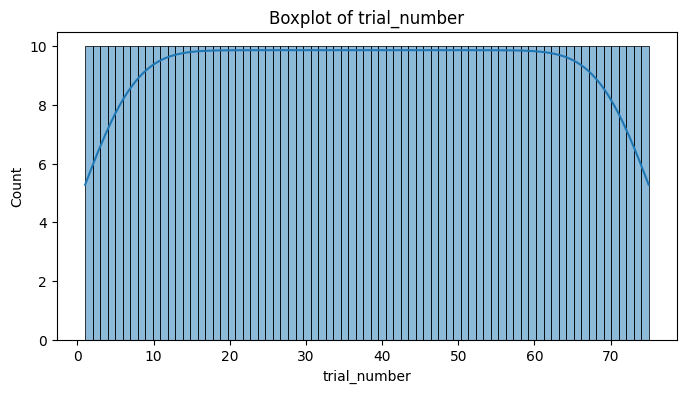

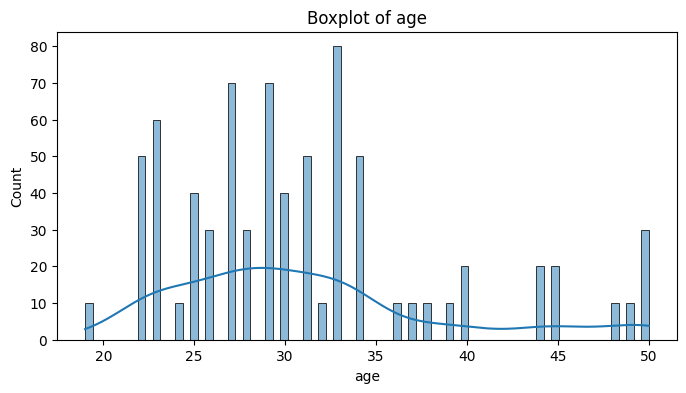

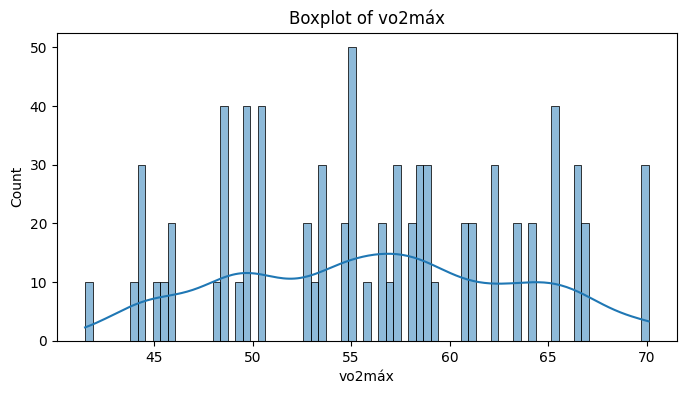

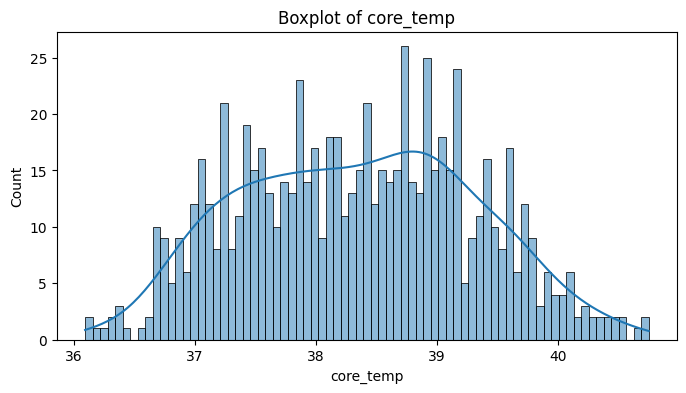

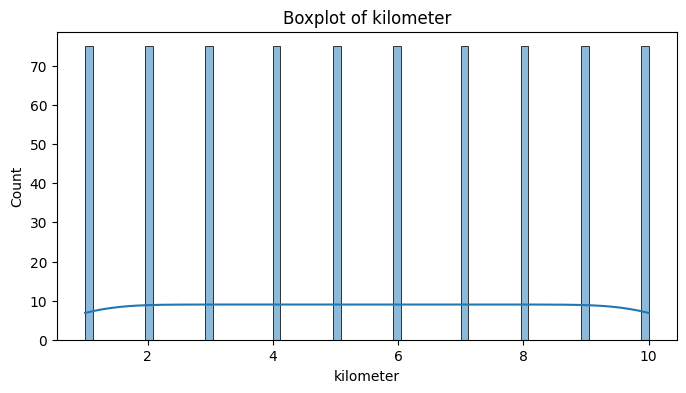

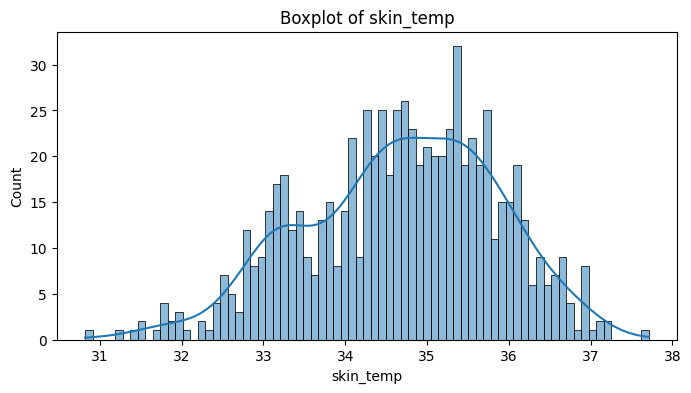

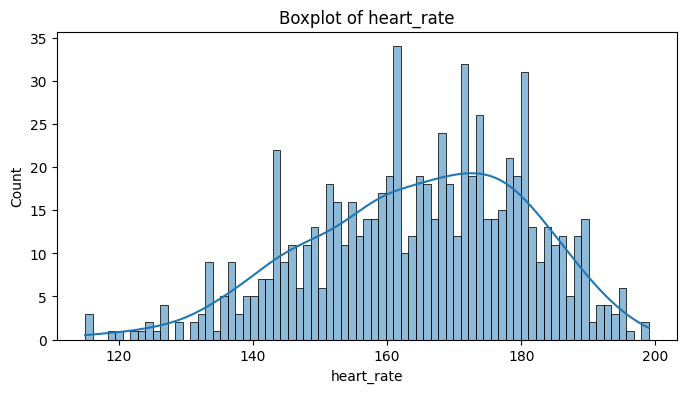

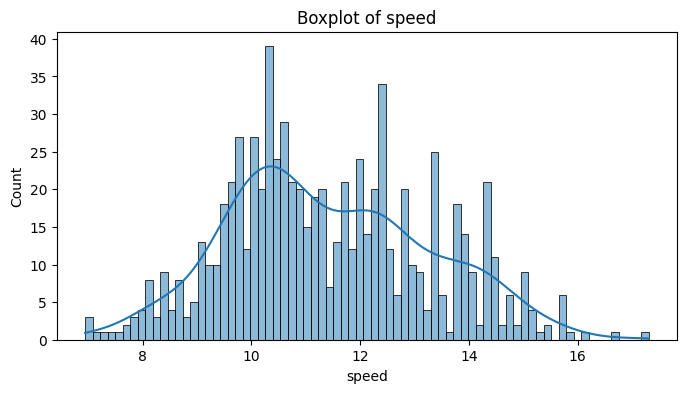

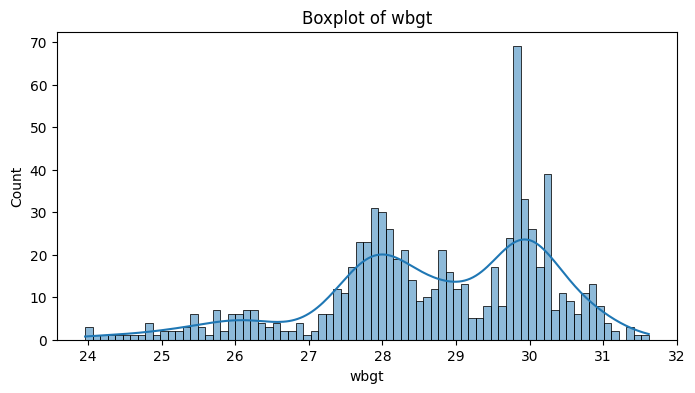

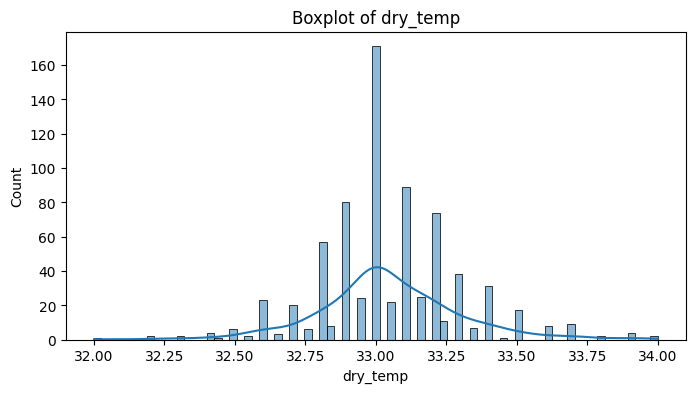

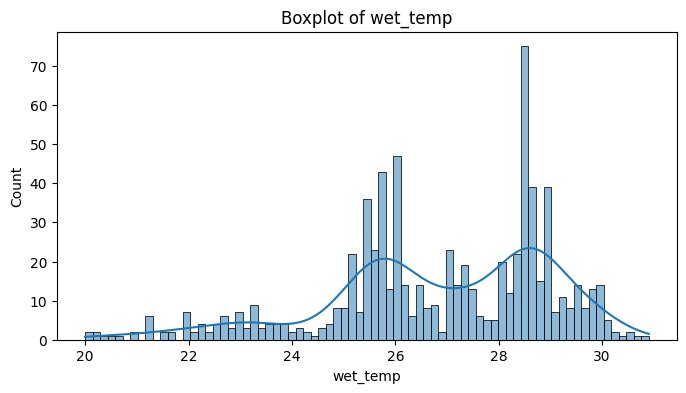

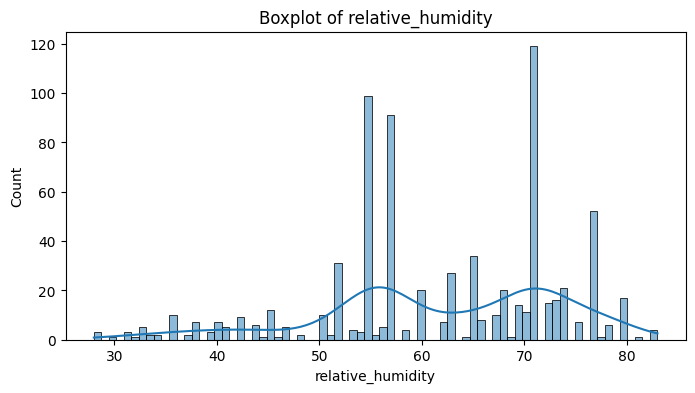

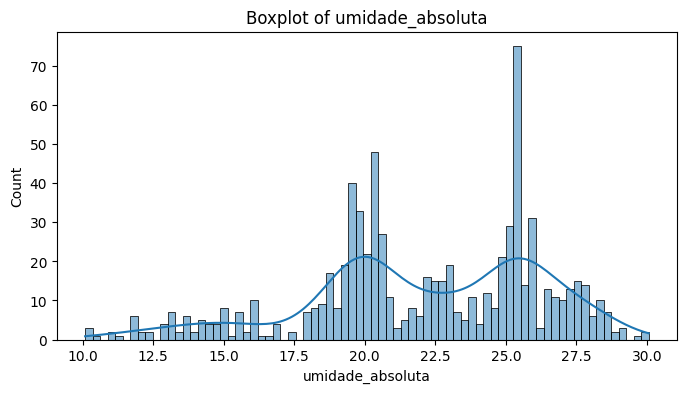

In [62]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=data[col], bins= 75, kde=True)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [63]:
# testar se o individuo com mais de um registro tem distribuiçoes diferentes

In [64]:
#salvando a base de dados tratada
data.to_csv('/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data1-1km.csv', index=False)